## Import relevant packages
import pandas to read the csv file

import matplotlib to visualise raw data

import numpy to clean up and correct numerical data

In [175]:

import pandas as pd
import matplotlib
from matplotlib import colors
from matplotlib.backends import backend_agg
import numpy as np
%matplotlib inline


## Use Pandas to read the CSV file in table form

In [176]:
lung_cancer_raw_data = pd.read_csv("data/lung_cancer.csv")
lung_cancer_raw_data

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,14681542544117760,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1271684316815736300,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1708068119984828000,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,355582900676614900,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1684597863357175300,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,620214966225393400,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Yes,Medium,Right,0
10344,1157407185152395000,59,Female,Yes,Not Present,Low,80,81,2008,2011,Yes,Medium,RightBoth,0
10345,1488013696766258000,34,Male,No,Not Present,High,65,57,2020,Still Smoking,No,Medium,RightBoth,1
10346,398703475201552000,69,Male,No,Not Present,High,81,75,2014,Still Smoking,No,Medium,Right,1


## Check for abnormal, outliers, duplicates and missing data

### Check for duplicate and non-numeric Patient IDs

In [177]:
# convert any non-numeric ID to NaN
lung_cancer_raw_data['ID'] = pd.to_numeric(lung_cancer_raw_data['ID'], errors='coerce')

# Filter rows with NaN
non_numeric_rows = lung_cancer_raw_data[lung_cancer_raw_data['ID'].isna()]

# Display NaN rows (if any). For this dataset, there are no NaN entries
print(non_numeric_rows)

# Identify duplicates based on the 'ID' column
duplicates_mask = lung_cancer_raw_data['ID'].duplicated(keep=False)

# Group the DataFrame by the 'ID' column
grouped_duplicates = lung_cancer_raw_data[duplicates_mask].sort_values(by='ID')

# Display the details of duplicated rows - duplicated entries appear to be entirely similar
print(grouped_duplicates)

# drop duplicate entries
lung_cancer_raw_data.drop_duplicates(subset=['ID'], inplace=True)

# Check that duplicate entries have been removed.
check_duplicates = lung_cancer_raw_data.duplicated(subset=['ID'], keep='first')

check_duplicates.value_counts()


Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence]
Index: []
                        ID  Age  Gender COPD History Genetic Markers  \
1271      9360174299016192   65    Male          Yes         Present   
10275     9360174299016192   65    Male          Yes         Present   
10290    17888143256279296   61    Male          Yes     Not Present   
658      17888143256279296   61    Male          Yes     Not Present   
10198    19981913339388160   65  Female          Yes         Present   
...                    ...  ...     ...          ...             ...   
6908   2285686125137233700   69    Male          NaN     Not Present   
294    2290146464812203500   78    Male          Yes         Present   
10176  2290146464812203500   78    Male          Yes         Present   
10093  2298459872211839500  

False    9998
Name: count, dtype: int64

### Check for negative and missing Age values

In [178]:
# Create a boolean mask for negative Age values
negative_age_mask = lung_cancer_raw_data['Age'] < 0

# Filter rows with negative Age values
rows_with_negative_age = lung_cancer_raw_data[negative_age_mask]

# Update the 'Age' column by using numpy's abs function to convert all -ve ages to +ve
lung_cancer_raw_data.loc[negative_age_mask, 'Age'] = np.abs(lung_cancer_raw_data.loc[negative_age_mask, 'Age'])

# verify that -ve values in 'Age' column have been corrected.
print(lung_cancer_raw_data[["Age"]].describe())

# check that there are no missing values for age
lung_cancer_raw_data[["Age"]].isnull().value_counts()


               Age
count  9998.000000
mean     64.059412
std      14.253842
min      18.000000
25%      54.000000
50%      64.000000
75%      74.000000
max     120.000000


Age  
False    9998
Name: count, dtype: int64

### Check gender data for missing/mispelt entries

In [179]:
# Replace "MALE" with "Male" and "FEMALE" with "Female"
lung_cancer_raw_data["Gender"] = lung_cancer_raw_data["Gender"].replace({"MALE": "Male", "FEMALE": "Female"})

# Remove row where 'Gender' is 'NAN', since there is only 1 entry
lung_cancer_raw_data = lung_cancer_raw_data[lung_cancer_raw_data['Gender'] != 'NAN']

print(lung_cancer_raw_data[["Gender"]].value_counts())

lung_cancer_raw_data[["Age"]].isnull().value_counts()

Gender
Male      5778
Female    4219
Name: count, dtype: int64


Age  
False    9997
Name: count, dtype: int64

### Check for non Yes/No entries in COPD History

In [180]:
# Check for values other than Yes/No
lung_cancer_raw_data['COPD History'].value_counts(dropna=False)

# Assumption made that null values should most likely by No, since COPD is a serious condition and it would most likely be documented if it occurred.
lung_cancer_raw_data.loc[:, 'COPD History'] = lung_cancer_raw_data['COPD History'].fillna('No')

# Verify that null values have been replaced with No
lung_cancer_raw_data['COPD History'].value_counts(dropna=False)

COPD History
Yes    5499
No     4498
Name: count, dtype: int64

### Check for abnormal entries in Genetic Markers

In [181]:
# Check that there are only Present/Not Present values
lung_cancer_raw_data['Genetic Markers'].value_counts(dropna=False)

Genetic Markers
Not Present    7518
Present        2479
Name: count, dtype: int64

### Check for abnormal entries in Air Pollution Exposure

In [182]:
# Check that there are only High/Low/Medium values
lung_cancer_raw_data['Air Pollution Exposure'].value_counts(dropna=False)

# Remove the 3 NaN rows from dataset
lung_cancer_raw_data = lung_cancer_raw_data.dropna(subset=['Air Pollution Exposure'])

# verify that NaN values have been removed
lung_cancer_raw_data['Air Pollution Exposure'].value_counts(dropna=False)

Air Pollution Exposure
High      6070
Low       2336
Medium    1588
Name: count, dtype: int64

### Check for non-numerical/negative entries in Last Weight and Current Weight

In [183]:
# My assumption here is that any weight value < 20 is definitely an error on the basis that everyone sampled is an adult
# Create a boolean mask for Last Weight values < 20
negative_last_weight_mask = lung_cancer_raw_data['Last Weight'] < 20

# Filter rows with negative Age values
rows_with_negative_last_weight = lung_cancer_raw_data[negative_last_weight_mask]

print(rows_with_negative_last_weight)

# Create a boolean mask for Current Weight values < 20
negative_current_weight_mask = lung_cancer_raw_data['Current Weight'] < 20

rows_with_negative_current_weight = lung_cancer_raw_data[negative_current_weight_mask]

print(rows_with_negative_current_weight)

# convert any non-numeric weights to NaN
lung_cancer_raw_data['Last Weight'] = pd.to_numeric(lung_cancer_raw_data['Last Weight'], errors='coerce')
lung_cancer_raw_data['Current Weight'] = pd.to_numeric(lung_cancer_raw_data['Current Weight'], errors='coerce')

# Filter rows with NaN
non_numeric_lw_rows = lung_cancer_raw_data[lung_cancer_raw_data['Last Weight'].isna()]
non_numeric_cw_rows = lung_cancer_raw_data[lung_cancer_raw_data['Current Weight'].isna()]

# Display NaN rows (if any). For this dataset, there are no NaN entries
print(non_numeric_lw_rows)
print(non_numeric_cw_rows)

# Conclusion: Last Weight and Current Weight Values are all intact and normal


Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence]
Index: []
Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence]
Index: []
Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence]
Index: []
Empty DataFrame
Columns: [ID, Age, Gender, COPD History, Genetic Markers, Air Pollution Exposure, Last Weight, Current Weight, Start Smoking, Stop Smoking, Taken Bronchodilators, Frequency of Tiredness, Dominant Hand, Lung Cancer Occurrence]
In

### Create a new column weight difference which takes Current Weight - Last Weight

In [184]:
lung_cancer_raw_data['Weight Difference'] = lung_cancer_raw_data['Current Weight'] - lung_cancer_raw_data['Last Weight']
lung_cancer_raw_data.head()

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Weight Difference
0,14681542544117760,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1,-4
1,1271684316815736300,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,-8
2,1708068119984828000,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0,10
3,355582900676614900,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1,-11
4,1684597863357175300,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0,-6


### Check data for Start Smoking and Stop Smoking columns

In [185]:
print(lung_cancer_raw_data['Start Smoking'].unique())
print(lung_cancer_raw_data['Stop Smoking'].unique())

# Convert Not Applicable values for both columns to 0, Convert Still Smoking values in Stop Smoking Column to 2023.
lung_cancer_raw_data['Start Smoking'] = lung_cancer_raw_data['Start Smoking'].replace('Not Applicable', 0)

lung_cancer_raw_data['Stop Smoking'] = lung_cancer_raw_data['Stop Smoking'].replace('Not Applicable', 0)
lung_cancer_raw_data['Stop Smoking'] = lung_cancer_raw_data['Stop Smoking'].replace('Still Smoking', 2024)

# Convert Year string values into numerical values
lung_cancer_raw_data['Start Smoking'] = pd.to_numeric(lung_cancer_raw_data['Start Smoking'], errors='coerce')
lung_cancer_raw_data['Stop Smoking'] = pd.to_numeric(lung_cancer_raw_data['Stop Smoking'], errors='coerce')

print(lung_cancer_raw_data['Start Smoking'].unique())
print(lung_cancer_raw_data['Start Smoking'].unique())


['2015' '2006' '1998' '2011' '1994' '2001' '1982' '1996' '1959' '2020'
 '2008' '2012' '1976' '2000' 'Not Applicable' '2004' '1981' '1999' '1963'
 '1991' '1995' '2019' '1973' '1967' '2016' '1975' '2021' '1978' '1987'
 '1980' '2018' '2003' '1979' '1969' '2023' '1955' '2017' '1997' '1962'
 '2013' '2022' '1971' '1960' '2005' '1993' '1972' '2010' '1985' '2007'
 '2014' '1961' '1945' '1974' '1965' '1966' '2009' '1989' '1954' '1970'
 '1950' '1953' '1990' '1948' '1958' '1940' '1984' '1968' '1986' '1983'
 '1988' '1956' '2024' '1992' '1977' '1939' '2002' '1957' '1923' '1944'
 '1964' '1943' '1952' '1951' '1947' '1935' '1941' '1930' '1937' '1927'
 '1946' '1934' '1928' '1942' '1949' '1938' '1936' '1929']
['2020' '2012' 'Still Smoking' '2014' '2017' '2022' '2009' '2021' '1999'
 '2016' 'Not Applicable' '1996' '1982' '1963' '1998' '2019' '2004' '1991'
 '1994' '2023' '2006' '2018' '2008' '2007' '1988' '1981' '1995' '1967'
 '2015' '1971' '1984' '2005' '2001' '2003' '2011' '1992' '2010' '2013'
 '1968' '19

### Create a new column "Smoking Duration (Years)" which contains the duration each person has smoked

In [186]:
lung_cancer_raw_data["Smoking Duration (Years)"] = lung_cancer_raw_data["Stop Smoking"] - lung_cancer_raw_data["Start Smoking"]
lung_cancer_raw_data["Smoking Duration (Years)"].describe()



count    9994.000000
mean       17.653892
std        17.056571
min         0.000000
25%         4.000000
50%        13.000000
75%        27.000000
max        91.000000
Name: Smoking Duration (Years), dtype: float64

### Check for values in Taken Bronchodilators column that are non Yes/No

In [187]:
lung_cancer_raw_data['Taken Bronchodilators'].value_counts(dropna=False)

# There are 1026 entires of NaN for this column, which I will fill with No. The assumption here is that there would be documented record if person has taken Bronchodilators
lung_cancer_raw_data.loc[:, 'Taken Bronchodilators'] = lung_cancer_raw_data['Taken Bronchodilators'].fillna('No')

lung_cancer_raw_data['Taken Bronchodilators'].value_counts(dropna=False)

Taken Bronchodilators
Yes    5548
No     4446
Name: count, dtype: int64

### Check for null values in Frequency of Tiredness Column

In [188]:
lung_cancer_raw_data['Frequency of Tiredness'].value_counts(dropna=False)

# Conclusion: No abnormal data found

Frequency of Tiredness
None / Low    4647
Medium        2676
High          2671
Name: count, dtype: int64

### Check for null values in Dominant Hand Column

In [189]:
lung_cancer_raw_data['Dominant Hand'].value_counts(dropna=False)

# Conclusion: No abnormal data found

Dominant Hand
Right        6669
Left         1683
RightBoth    1642
Name: count, dtype: int64

### Check for values in Lung Cancer Occurrence that are not 1 or 0

In [190]:
lung_cancer_raw_data['Lung Cancer Occurrence'].value_counts(dropna=False)

# Conclusion: No abnormal data found

Lung Cancer Occurrence
1    5438
0    4556
Name: count, dtype: int64

### Export cleaned data into a fresh file for analysis

In [191]:
lung_cancer_raw_data.to_csv('data/cleaned_lung_cancer.csv', index=False)


### Visualise and get statistics for each independent variable vs the dependent variable (lung cancer occurrence) to see if there is any significant correlation between the 2. Significant correlation could be positive or negative, and would be a large difference between those without lung cancer, and those with lung cancer for that independent variable.

### Independent variables deemed significant will be included inside the data for machine learning.

In [192]:
lung_cancer_cleaned_data = pd.read_csv("data/cleaned_lung_cancer.csv")
lung_cancer_vs_age = lung_cancer_cleaned_data.groupby('Lung Cancer Occurrence')['Age'].describe()
lung_cancer_vs_age

,count,mean,std,min,25%,50%,75%,max
Lung Cancer Occurrence,,,,,,,,
0,4556.0,63.909350,13.604299,18.0,55.0,64.0,73.0,115.0
1,5438.0,64.184627,14.779618,18.0,54.0,64.0,74.0,120.0


<Axes: >

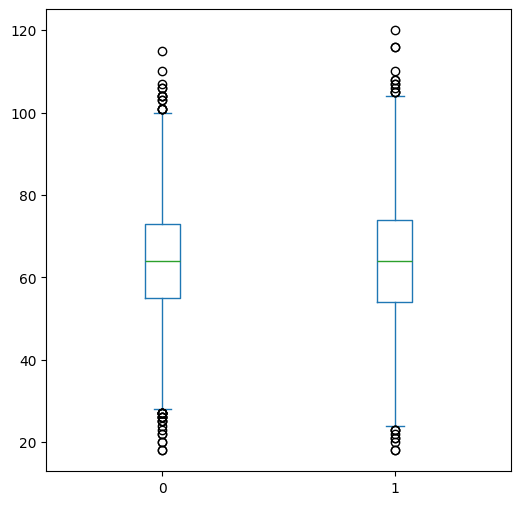

In [204]:
lung_cancer_cleaned_data.pivot(columns='Lung Cancer Occurrence', values='Age').plot(kind='box', figsize=(6,6))

### Conclusion: Age does not differ significantly between the 2 groups, hence it will not be included inside the dataset.

Lung Cancer Occurrence
0    2951
1    2824
Name: count, dtype: int64
Lung Cancer Occurrence
0    1605
1    2614
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Lung Cancer Occurrence')
2


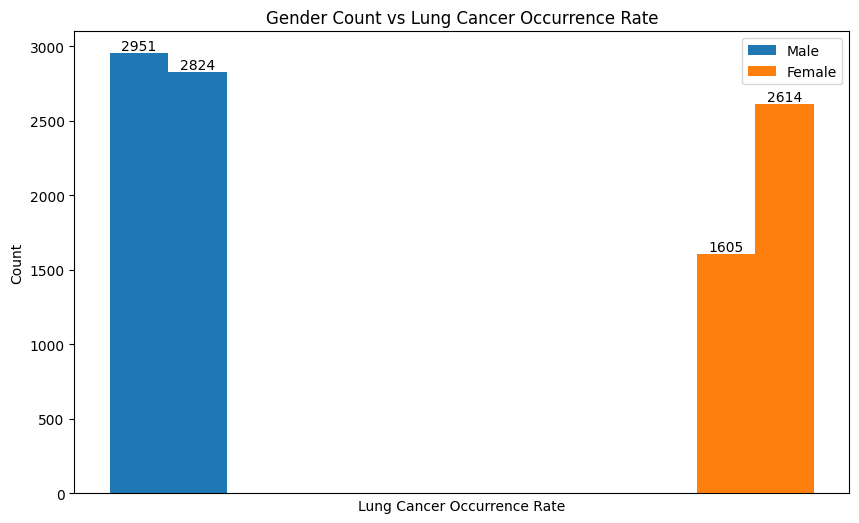

In [194]:
# Create a grouped bar chart
matplotlib.pyplot.figure(figsize=(10, 6))

# Iterate over unique values of the independent variable
for i, group in enumerate(lung_cancer_cleaned_data['Gender'].unique()):
    # Filter data for the current group
    group_data = lung_cancer_cleaned_data[lung_cancer_cleaned_data['Gender'] == group]

    # Count occurrences of each category in the dependent variable
    category_counts = group_data['Lung Cancer Occurrence'].value_counts().sort_index()

    print(category_counts)

    # Plot the bars for each category
    bars = matplotlib.pyplot.bar(
        x=[i + 0.1 * j for j in range(len(category_counts))],
        height=category_counts.values,
        width=0.1,
        label=group
    )

    # Annotate each bar with its count
    for bar, count in zip(bars, category_counts.values):
        matplotlib.pyplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                 f'{count}', ha='center', va='bottom')



# Set labels and title
matplotlib.pyplot.xlabel('Lung Cancer Occurrence Rate')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Gender Count vs Lung Cancer Occurrence Rate')
print(category_counts.index)
print(len(category_counts))

# Hide xticks
matplotlib.pyplot.xticks([])

# Show legend
matplotlib.pyplot.legend()

# Show the plot
matplotlib.pyplot.show()

### Conclusion: From the data above, women seem more predisposed to lung cancer, hence this column will be included in the dataset.

Lung Cancer Occurrence
0    1974
1    2521
Name: count, dtype: int64
Lung Cancer Occurrence
0    2582
1    2917
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Lung Cancer Occurrence')
2


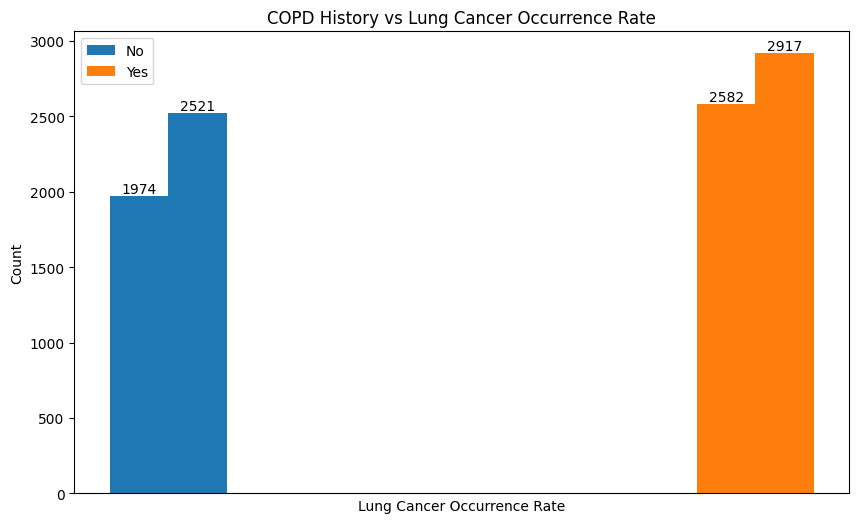

In [195]:
# Create a grouped bar chart
matplotlib.pyplot.figure(figsize=(10, 6))

# Iterate over unique values of the independent variable
for i, group in enumerate(lung_cancer_cleaned_data['COPD History'].unique()):
    # Filter data for the current group
    group_data = lung_cancer_cleaned_data[lung_cancer_cleaned_data['COPD History'] == group]

    # Count occurrences of each category in the dependent variable
    category_counts = group_data['Lung Cancer Occurrence'].value_counts().sort_index()

    print(category_counts)

    # Plot the bars for each category
    bars = matplotlib.pyplot.bar(
        x=[i + 0.1 * j for j in range(len(category_counts))],
        height=category_counts.values,
        width=0.1,
        label=group
    )

    # Annotate each bar with its count
    for bar, count in zip(bars, category_counts.values):
        matplotlib.pyplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                 f'{count}', ha='center', va='bottom')


# Set labels and title
matplotlib.pyplot.xlabel('Lung Cancer Occurrence Rate')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('COPD History vs Lung Cancer Occurrence Rate')
print(category_counts.index)
print(len(category_counts))

# Hide xticks
matplotlib.pyplot.xticks([])

# Show legend
matplotlib.pyplot.legend()

# Show the plot
matplotlib.pyplot.show()

### Conclusion: From the data above, those with COPD history appear to be less likely to have lung cancer compared to those without COPD history, hence this data will be included in the dataset.

Lung Cancer Occurrence
0    3842
1    3675
Name: count, dtype: int64
Lung Cancer Occurrence
0     714
1    1763
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Lung Cancer Occurrence')
2


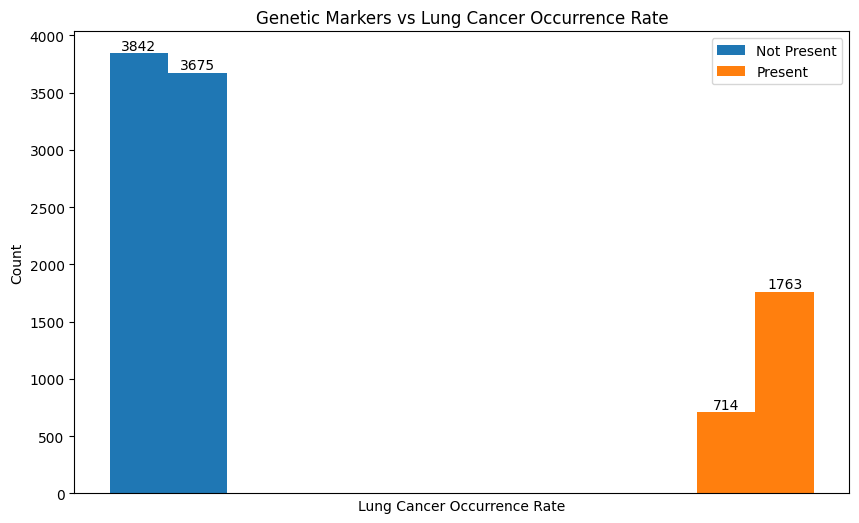

In [196]:
# Create a grouped bar chart
matplotlib.pyplot.figure(figsize=(10, 6))

# Iterate over unique values of the independent variable
for i, group in enumerate(lung_cancer_cleaned_data['Genetic Markers'].unique()):
    # Filter data for the current group
    group_data = lung_cancer_cleaned_data[lung_cancer_cleaned_data['Genetic Markers'] == group]

    # Count occurrences of each category in the dependent variable
    category_counts = group_data['Lung Cancer Occurrence'].value_counts().sort_index()

    print(category_counts)

    # Plot the bars for each category
    bars = matplotlib.pyplot.bar(
        x=[i + 0.1 * j for j in range(len(category_counts))],
        height=category_counts.values,
        width=0.1,
        label=group
    )

    # Annotate each bar with its count
    for bar, count in zip(bars, category_counts.values):
        matplotlib.pyplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                 f'{count}', ha='center', va='bottom')


# Set labels and title
matplotlib.pyplot.xlabel('Lung Cancer Occurrence Rate')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Genetic Markers vs Lung Cancer Occurrence Rate')
print(category_counts.index)
print(len(category_counts))

# Hide xticks
matplotlib.pyplot.xticks([])

# Show legend
matplotlib.pyplot.legend()

# Show the plot

### Conclusion: From the data above, those with present genetic markers appear to be much more likely to have lung cancer compared to those without genetic markers, hence this data will be included in the dataset.

Lung Cancer Occurrence
0    715
1    873
Name: count, dtype: int64
Lung Cancer Occurrence
0    2529
1    3541
Name: count, dtype: int64
Lung Cancer Occurrence
0    1312
1    1024
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Lung Cancer Occurrence')
2


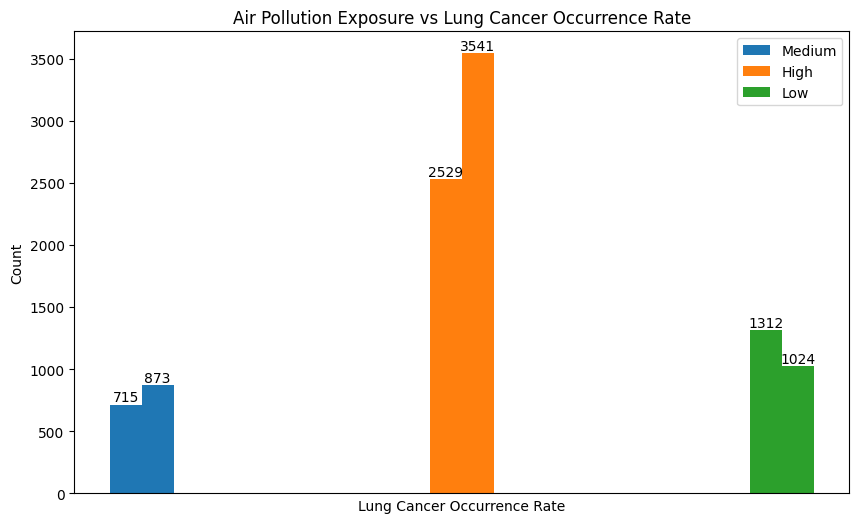

In [198]:
# Create a grouped bar chart
matplotlib.pyplot.figure(figsize=(10, 6))

# Iterate over unique values of the independent variable
for i, group in enumerate(lung_cancer_cleaned_data['Air Pollution Exposure'].unique()):
    # Filter data for the current group
    group_data = lung_cancer_cleaned_data[lung_cancer_cleaned_data['Air Pollution Exposure'] == group]

    # Count occurrences of each category in the dependent variable
    category_counts = group_data['Lung Cancer Occurrence'].value_counts().sort_index()

    print(category_counts)

    # Plot the bars for each category
    bars = matplotlib.pyplot.bar(
        x=[i + 0.1 * j for j in range(len(category_counts))],
        height=category_counts.values,
        width=0.1,
        label=group
    )

    # Annotate each bar with its count
    for bar, count in zip(bars, category_counts.values):
        matplotlib.pyplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                 f'{count}', ha='center', va='bottom')


# Set labels and title
matplotlib.pyplot.xlabel('Lung Cancer Occurrence Rate')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Air Pollution Exposure vs Lung Cancer Occurrence Rate')
print(category_counts.index)
print(len(category_counts))

# Hide xticks
matplotlib.pyplot.xticks([])

# Show legend
matplotlib.pyplot.legend()

# Show the plot

### Conclusion: From the data above, individuals with medium air pollution exposure (minor extent) and high air pollution exposure (major extent) are more susceptible to lung cancer. This dataset will be included.

Lung Cancer Occurrence
0    1941
1    2505
Name: count, dtype: int64
Lung Cancer Occurrence
0    2615
1    2933
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Lung Cancer Occurrence')
2


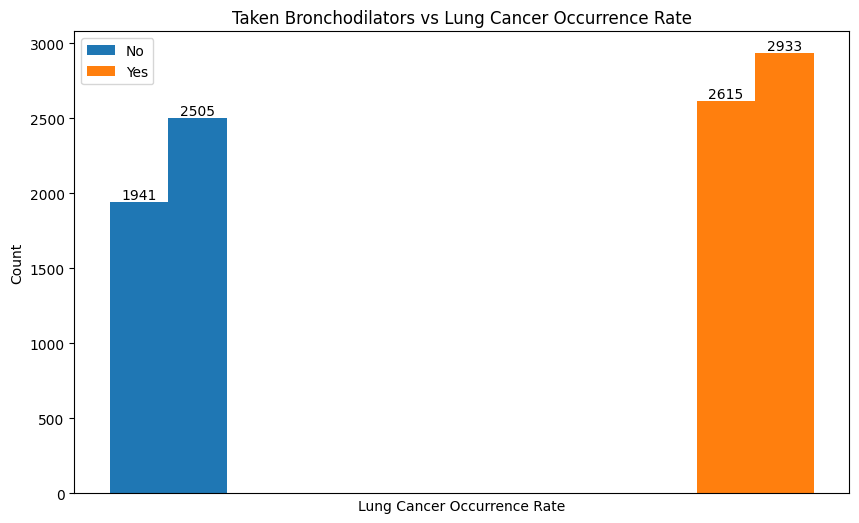

In [199]:
# Create a grouped bar chart
matplotlib.pyplot.figure(figsize=(10, 6))

# Iterate over unique values of the independent variable
for i, group in enumerate(lung_cancer_cleaned_data['Taken Bronchodilators'].unique()):
    # Filter data for the current group
    group_data = lung_cancer_cleaned_data[lung_cancer_cleaned_data['Taken Bronchodilators'] == group]

    # Count occurrences of each category in the dependent variable
    category_counts = group_data['Lung Cancer Occurrence'].value_counts().sort_index()

    print(category_counts)

    # Plot the bars for each category
    bars = matplotlib.pyplot.bar(
        x=[i + 0.1 * j for j in range(len(category_counts))],
        height=category_counts.values,
        width=0.1,
        label=group
    )

    # Annotate each bar with its count
    for bar, count in zip(bars, category_counts.values):
        matplotlib.pyplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                 f'{count}', ha='center', va='bottom')


# Set labels and title
matplotlib.pyplot.xlabel('Lung Cancer Occurrence Rate')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Taken Bronchodilators vs Lung Cancer Occurrence Rate')
print(category_counts.index)
print(len(category_counts))

# Hide xticks
matplotlib.pyplot.xticks([])

# Show legend
matplotlib.pyplot.legend()

# Show the plot

### Conclusion: From the data above, those who have taken Bronchodilators appear to be less likely to have lung cancer compared to those who have not taken Bronchodilators, hence this data will be included in the dataset.

Lung Cancer Occurrence
0    2088
1    2559
Name: count, dtype: int64
Lung Cancer Occurrence
0    1211
1    1465
Name: count, dtype: int64
Lung Cancer Occurrence
0    1257
1    1414
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Lung Cancer Occurrence')
2


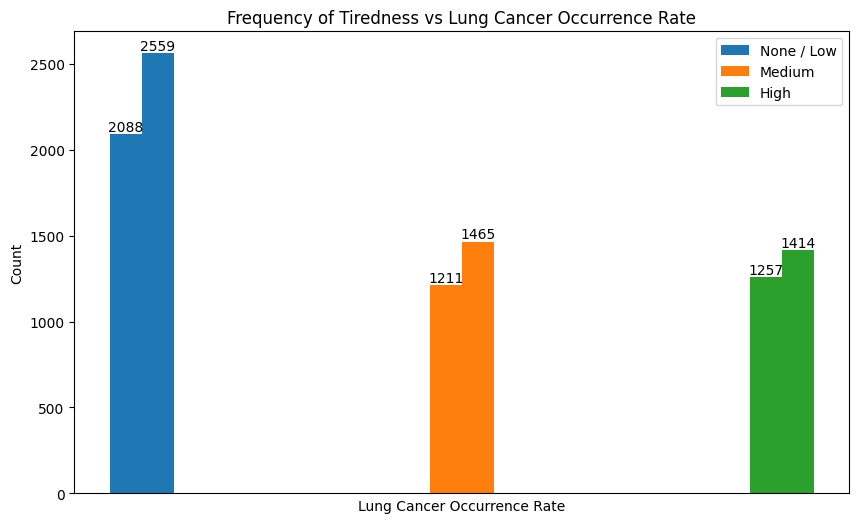

In [200]:
# Create a grouped bar chart
matplotlib.pyplot.figure(figsize=(10, 6))

# Iterate over unique values of the independent variable
for i, group in enumerate(lung_cancer_cleaned_data['Frequency of Tiredness'].unique()):
    # Filter data for the current group
    group_data = lung_cancer_cleaned_data[lung_cancer_cleaned_data['Frequency of Tiredness'] == group]

    # Count occurrences of each category in the dependent variable
    category_counts = group_data['Lung Cancer Occurrence'].value_counts().sort_index()

    print(category_counts)

    # Plot the bars for each category
    bars = matplotlib.pyplot.bar(
        x=[i + 0.1 * j for j in range(len(category_counts))],
        height=category_counts.values,
        width=0.1,
        label=group
    )

    # Annotate each bar with its count
    for bar, count in zip(bars, category_counts.values):
        matplotlib.pyplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                 f'{count}', ha='center', va='bottom')


# Set labels and title
matplotlib.pyplot.xlabel('Lung Cancer Occurrence Rate')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Frequency of Tiredness vs Lung Cancer Occurrence Rate')
print(category_counts.index)
print(len(category_counts))

# Hide xticks
matplotlib.pyplot.xticks([])

# Show legend
matplotlib.pyplot.legend()

# Show the plot

### Conclusion: From the data above, there does not seem to be a very strong correlation between frequency of tiredness and lung cancer occurrence rate, hence this column will not be included in the dataset.

Lung Cancer Occurrence
0    3039
1    3630
Name: count, dtype: int64
Lung Cancer Occurrence
0    740
1    943
Name: count, dtype: int64
Lung Cancer Occurrence
0    777
1    865
Name: count, dtype: int64
Index([0, 1], dtype='int64', name='Lung Cancer Occurrence')
2


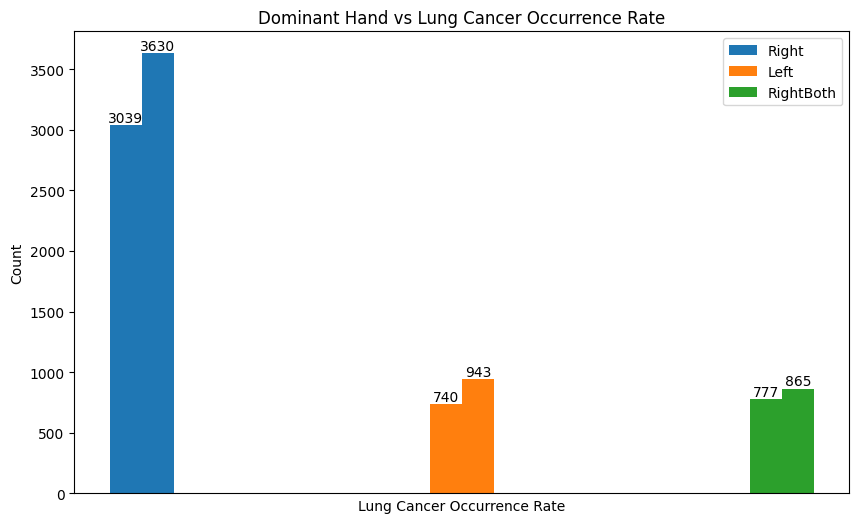

In [201]:
# Create a grouped bar chart
matplotlib.pyplot.figure(figsize=(10, 6))

# Iterate over unique values of the independent variable
for i, group in enumerate(lung_cancer_cleaned_data['Dominant Hand'].unique()):
    # Filter data for the current group
    group_data = lung_cancer_cleaned_data[lung_cancer_cleaned_data['Dominant Hand'] == group]

    # Count occurrences of each category in the dependent variable
    category_counts = group_data['Lung Cancer Occurrence'].value_counts().sort_index()

    print(category_counts)

    # Plot the bars for each category
    bars = matplotlib.pyplot.bar(
        x=[i + 0.1 * j for j in range(len(category_counts))],
        height=category_counts.values,
        width=0.1,
        label=group
    )

    # Annotate each bar with its count
    for bar, count in zip(bars, category_counts.values):
        matplotlib.pyplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                 f'{count}', ha='center', va='bottom')


# Set labels and title
matplotlib.pyplot.xlabel('Lung Cancer Occurrence Rate')
matplotlib.pyplot.ylabel('Count')
matplotlib.pyplot.title('Dominant Hand vs Lung Cancer Occurrence Rate')
print(category_counts.index)
print(len(category_counts))

# Hide xticks
matplotlib.pyplot.xticks([])

# Show legend
matplotlib.pyplot.legend()

# Show the plot

### Conclusion: From the data above, there does not seem to be a very strong correlation between dominant hand and lung cancer occurrence rate, hence this column will not be included in the dataset.

In [202]:
lung_cancer_vs_weight = lung_cancer_cleaned_data.groupby('Lung Cancer Occurrence')['Weight Difference'].describe()
lung_cancer_vs_weight

,count,mean,std,min,25%,50%,75%,max
Lung Cancer Occurrence,,,,,,,,
0,4556.0,-0.077480,6.662569,-15.0,-5.0,0.0,5.0,15.0
1,5438.0,-5.409158,5.717695,-20.0,-10.0,-5.0,-1.0,5.0


<Axes: >

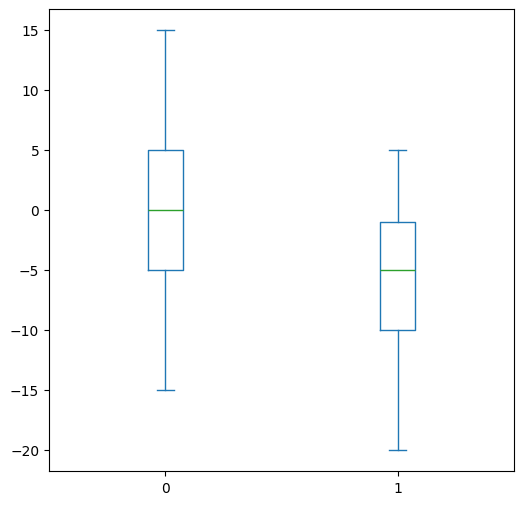

In [203]:
lung_cancer_cleaned_data.pivot(columns='Lung Cancer Occurrence', values='Weight Difference').plot(kind='box', figsize=(6,6))

### From the data, individuals with a larger negative weight difference are more likely to have lung cancer, hence this column will be included in the dataset.

In [205]:
lung_cancer_vs_smoking_duration = lung_cancer_cleaned_data.groupby('Lung Cancer Occurrence')['Smoking Duration (Years)'].describe()
lung_cancer_vs_smoking_duration

,count,mean,std,min,25%,50%,75%,max
Lung Cancer Occurrence,,,,,,,,
0,4556.0,18.086479,17.738359,0.0,4.0,13.0,28.0,90.0
1,5438.0,17.291467,16.456535,0.0,4.0,13.0,27.0,91.0


<Axes: >

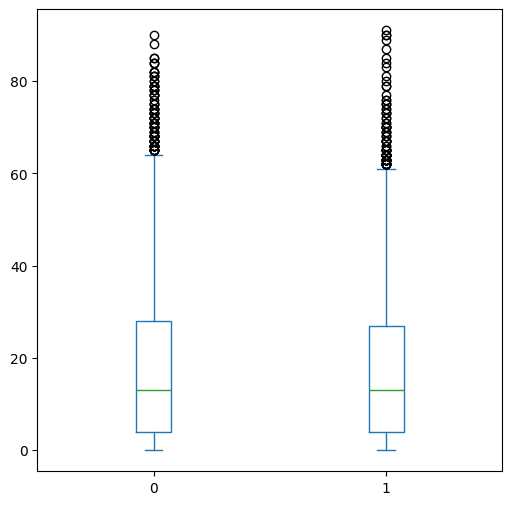

In [206]:
lung_cancer_cleaned_data.pivot(columns='Lung Cancer Occurrence', values='Smoking Duration (Years)').plot(kind='box', figsize=(6,6))

### From the data, it appears that smoking duration does not appear to have any significant effect on lung cancer occurrence, However, this dataset will be included, since smoking has been stated to cause lung cancer.